In [1]:
import os
from prerender.utils.features_description import *
import tensorflow as tf

2023-04-26 15:07:44.070815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
project_dir = "/Users/xuyixuan/Downloads/Project/waymo-motion-prediction-challenge-2022-multipath-plus-plus"
FILENAME = os.path.join(project_dir, 'dataset/tfrecord-00004-of-01000')


In [54]:
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
data = next(dataset.as_numpy_iterator())

In [63]:
# Initialize a counter
record_count = 0

# Iterate through the dataset and count the records
for record in dataset:
    record_count += 1

print(f'The size of the dataset is: {record_count}')

The size of the dataset is: 456


In [55]:
features_description = generate_features_description()

In [56]:
parsed = tf.io.parse_single_example(data, features_description)
parsed

{'roadgraph_samples/dir': <tf.Tensor: shape=(30000, 3), dtype=float32, numpy=
 array([[ 0.02333741,  0.9997066 ,  0.00648669],
        [ 0.02338673,  0.99970543,  0.00648669],
        [ 0.02342151,  0.99970466,  0.00648669],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]], dtype=float32)>,
 'roadgraph_samples/id': <tf.Tensor: shape=(30000, 1), dtype=int64, numpy=
 array([[104],
        [104],
        [104],
        ...,
        [ -1],
        [ -1],
        [ -1]])>,
 'roadgraph_samples/type': <tf.Tensor: shape=(30000, 1), dtype=int64, numpy=
 array([[ 2],
        [ 2],
        [ 2],
        ...,
        [-1],
        [-1],
        [-1]])>,
 'roadgraph_samples/valid': <tf.Tensor: shape=(30000, 1), dtype=int64, numpy=
 array([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])>,
 'roadgraph_samples/xyz': <tf.Tensor: shape=(30000, 3), dtype=float

In [57]:
tf.unique(tf.reshape(parsed['roadgraph_samples/id'], [-1]))

Unique(y=<tf.Tensor: shape=(220,), dtype=int64, numpy=
array([104, 107, 108, 109, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       163, 170, 171, 172, 173, 176, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284,
       285, 286, 287,  11,  12,  13,  14,  17,  20,  21,  24,  25,  27,
        29,  31,  32,  33,  34,  51,  52,  53,  56,  57,  60,  61,  63,
        6

In [58]:
parsed['state/type']

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        1.,  2.,  1.,  2.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
      dtype=float32)>

In [59]:
parsed['state/is_sdc']

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])>

In [40]:
import numpy as np

np.array([
np.concatenate([parsed["state/past/x"], parsed["state/current/x"]], axis=1),
np.concatenate([parsed["state/past/y"], parsed["state/current/y"]], axis=1)
]).shape

(2, 128, 11)

In [41]:
np.array([
np.concatenate([parsed["state/past/x"], parsed["state/current/x"]], axis=1),
np.concatenate([parsed["state/past/y"], parsed["state/current/y"]], axis=1)
]).transpose(1, 2, 0).shape

(128, 11, 2)

In [43]:
parsed["state/future/x"]

<tf.Tensor: shape=(128, 80), dtype=float32, numpy=
array([[344.85544, 345.65906, 346.4541 , ..., 383.08438, 383.2746 ,
        383.46927],
       [357.1684 , 357.79407, 358.4127 , ..., 392.82288, 393.18475,
        393.5413 ],
       [346.8365 , 346.8365 , 346.8365 , ..., 346.8365 , 346.8365 ,
        346.8365 ],
       ...,
       [ -1.     ,  -1.     ,  -1.     , ...,  -1.     ,  -1.     ,
         -1.     ],
       [ -1.     ,  -1.     ,  -1.     , ...,  -1.     ,  -1.     ,
         -1.     ],
       [ -1.     ,  -1.     ,  -1.     , ...,  -1.     ,  -1.     ,
         -1.     ]], dtype=float32)>

In [42]:
np.array(
            [parsed["state/future/x"], parsed["state/future/y"]]).transpose(1, 2, 0).shape

(128, 80, 2)

In [72]:
import matplotlib.pyplot as plt

In [73]:
def parse_one_scene(filename):
    dataset = tf.data.TFRecordDataset(filename, compression_type='')
    data = next(dataset.as_numpy_iterator())
    parsed = tf.io.parse_single_example(data, generate_features_description())
    return parsed


def plot_arrowbox(center, yaw, length, width, color, alpha=1):
    c, s = np.cos(yaw), np.sin(yaw)
    R = np.array(((c, -s), (s, c))).reshape(2, 2)
    box = np.array([
        [-length / 2, -width / 2],
        [-length / 2, width / 2],
        [length / 2, width / 2],
        [length * 1.3 / 2, 0],
        [length / 2, -width / 2],
        [-length / 2, -width / 2]])
    box = box @ R.T + center
    plt.plot(box[:, 0], box[:, 1], color=color, alpha=alpha)


def plot_roadlines(segments):
    plt.scatter(segments[:, 0, 0], segments[:, 0, 1], color="black", s=0.1)


def plot_scene(scene_data):
    for timezone, color in [('history', 'blue'), ('future', 'yellow')]:
        for i in range(len(scene_data[f"other/{timezone}/xy"])):
            for other_position, other_yaw, other_valid in zip(
                    scene_data[
                        f"other/{timezone}/xy"][i],
                    scene_data[f"other/{timezone}/yaw"][i],
                    scene_data[f"other/{timezone}/valid"][i]):
                if other_valid.item() == 0:
                    continue
                plot_arrowbox(
                    other_position, other_yaw, scene_data["other/length"][i],
                    scene_data["target/width"], color, alpha=0.5)

    for timezone, color in [('history', 'red'), ('future', 'green')]:
        for target_position, target_yaw, target_valid in zip(
                scene_data[f"target/{timezone}/xy"][0],
                scene_data[f"target/{timezone}/yaw"][0, :, 0],
                scene_data[f"target/{timezone}/valid"][0, :, 0]):
            if target_valid == 0:
                continue
            plot_arrowbox(target_position, target_yaw, scene_data["target/length"],
                          scene_data["target/width"], color)

    plot_roadlines(scene_data["road_network_segments"])

In [74]:
from prerender.utils.utils import get_config
from model.data import *

In [75]:
config = get_config("/Users/xuyixuan/Downloads/Project/waymo-motion-prediction-challenge-2022-multipath-plus-plus/code/configs/final_RoP_Cov_Single.yaml")
dataset = MultiPathPPDataset(config["train"]["data_config"]["dataset_config"])

In [88]:
dataset[1]['target/agent_type']

array([2])

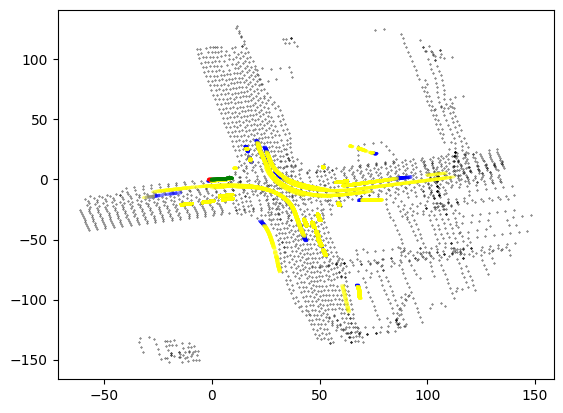

In [89]:
plot_scene(dataset[1])

In [86]:
dataset[6]['target/agent_type']

array([2])

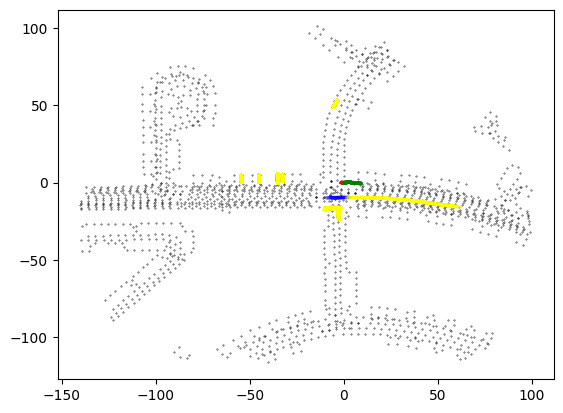

In [87]:
plot_scene(dataset[6])

In [91]:
count = 0
for i in range(len(dataset)):
    if dataset[i]['target/agent_type'] == 2:
        print(i)
        count += 1

print("Number of samples with 'target/agent_type' == 2:", count)

1
3
6
16
20
24
25
35
44
51
61
82
92
93
99
120
127
144
155
158
159
163
176
178
190
215
217
218
221
223
229
230
242
248
253
260
262
265
269
292
293
294
296
299
303
305
311
329
332
351
362
365
367
371
376
398
403
411
414
428
432
448
470
484
485
491
503
510
537
543
551
555
556
562
571
576
593
606
607
623
634
659
661
662
665
669
674
680
701
708
719
721
722
725
727
745
758
760
781
797
805
854
867
872
878
893
896
913
915
951
952
963
968
973
978
989
991
1016
1024
1026
1059
1064
1074
1080
1090
1093
1106
1108
1111
1115
1117
1118
1119
1121
1122
1124
1135
1139
1146
1149
1163
1170
1187
1201
1205
1207
1221
1271
1286
1290
1312
1317
1329
1333
1354
1367
1395
1416
1421
1435
1444
1452
1464
1465
1469
1474
1482
1487
1488
1490
1499
1503
1511
1517
1522
1524
1526
1552
1561
1580
1588
1597
1608
1615
1629
1649
1673
1714
1728
1732
1742
1746
1747
1758
1765
1766
1770
1796
1798
1817
1837
1840
1841
1875
1913
1916
1921
1938
1949
1950
1956
1960
1961
1982
1993
2002
Number of samples with 'target/agent_type' == 2: 216


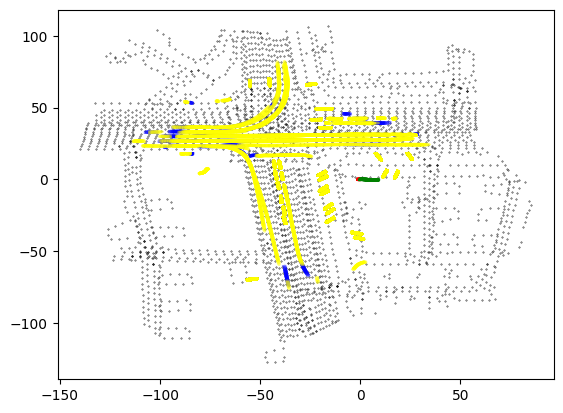

In [95]:
plot_scene(dataset[92])

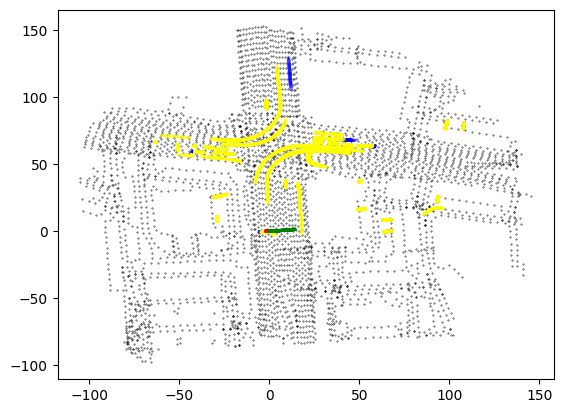

In [96]:
plot_scene(dataset[93])
